C:\Users\user\anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


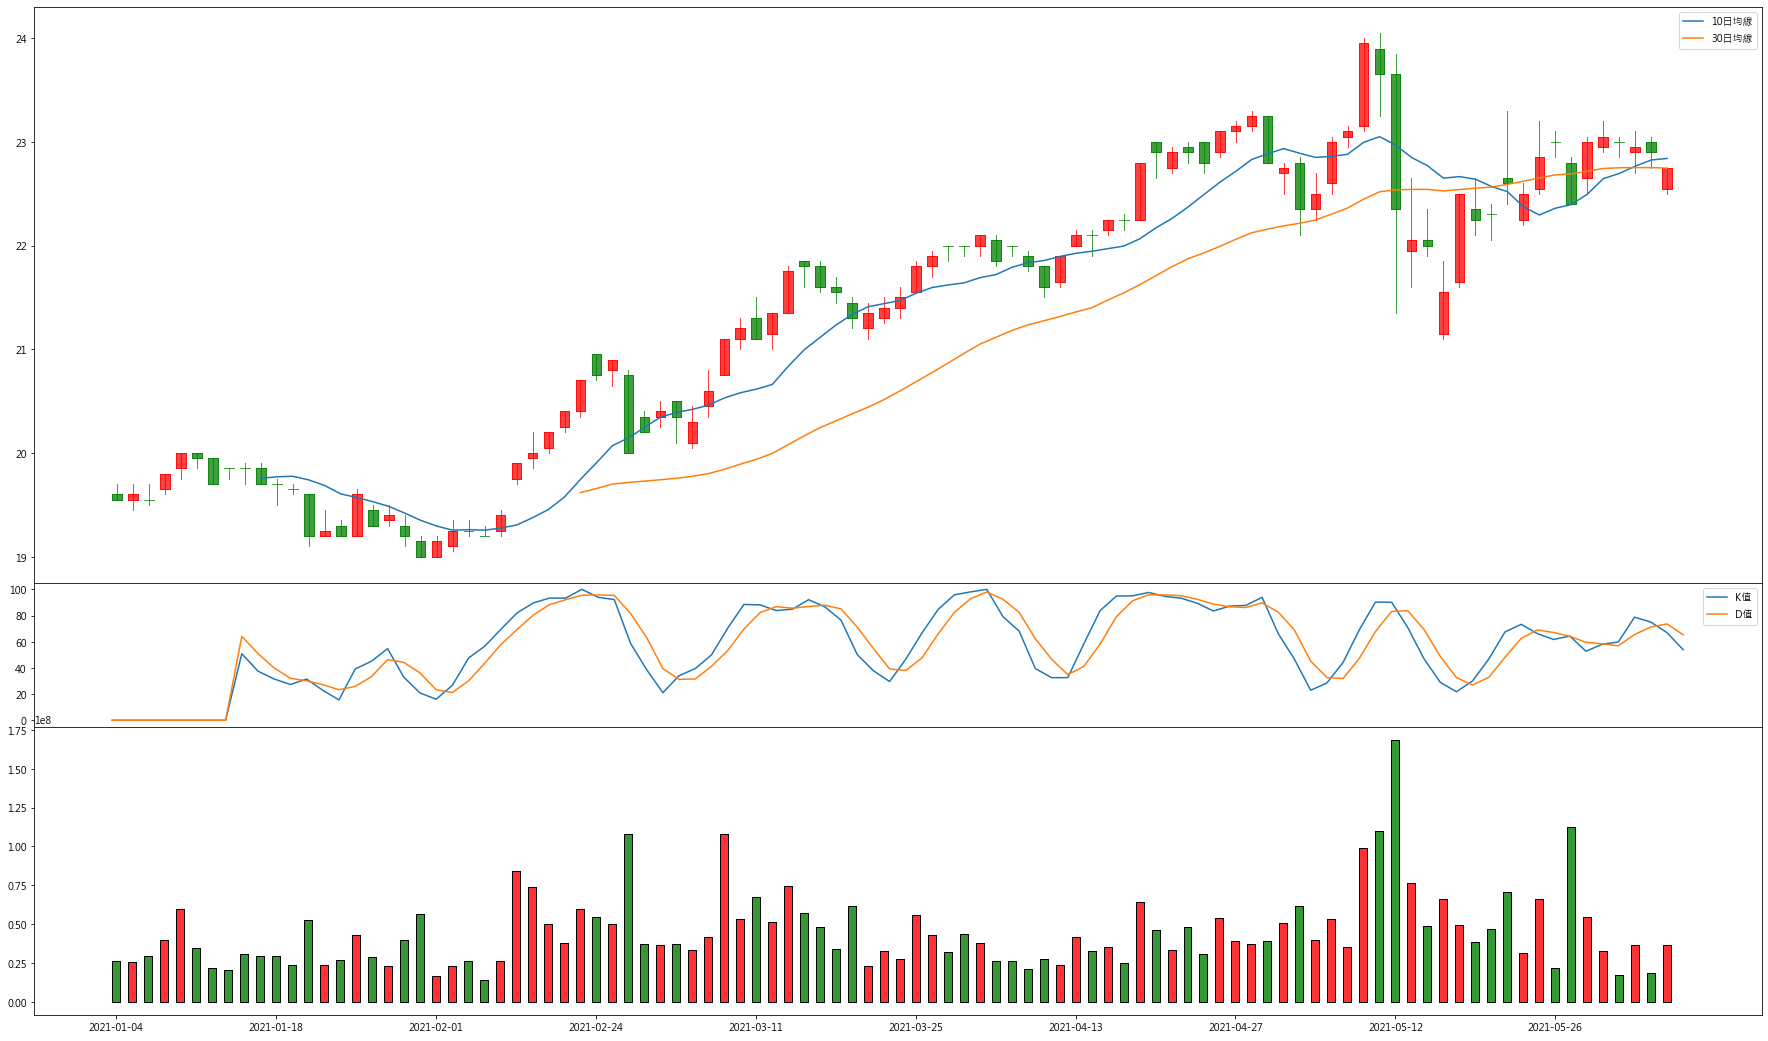

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import mpl_finance as mpf
%matplotlib inline
import seaborn as sns
import datetime as datetime
import talib
#取得股票資料
start = datetime.datetime(2021,1,1)
df_2891 = pdr.DataReader('2891.TW', 'yahoo', start=start)
#設定圖表資訊
df_2891.index = df_2891.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 
fig = plt.figure(figsize=(24, 20))
ax = fig.add_axes([0,0.3,1,0.4])
ax2 = fig.add_axes([0,0.2,1,0.1])
ax3 = fig.add_axes([0,0,1,0.2])
#繪製蠟燭圖
ax.set_xticks(range(0, len(df_2891.index), 10))
ax.set_xticklabels(df_2891.index[::10])
mpf.candlestick2_ochl(ax, df_2891['Open'], df_2891['Close'], df_2891['High'],
                      df_2891['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75);
#加上10日均線和30日均線
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
sma_10 = talib.SMA(np.array(df_2891['Close']), 10)
sma_30 = talib.SMA(np.array(df_2891['Close']), 30)
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')
#加上KD指標
#前8天為Nan值，為了讓時間序列相同，因此將Nan值填入0，所以前8天的KD值無參考價值
df_2891['k'], df_2891['d'] = talib.STOCH(df_2891['High'], df_2891['Low'], df_2891['Close'])
df_2891['k'].fillna(value=0, inplace=True)
df_2891['d'].fillna(value=0, inplace=True)
ax2.plot(df_2891['k'], label='K值')
ax2.plot(df_2891['d'], label='D值')
ax2.set_xticks(range(0, len(df_2891.index), 10))
ax2.set_xticklabels(df_2891.index[::10])
#加上交易量
mpf.volume_overlay(ax3, df_2891['Open'], df_2891['Close'], df_2891['Volume'], 
                   colorup='r', colordown='g', width=0.5, alpha=0.8)
ax3.set_xticks(range(0, len(df_2891.index), 10))
ax3.set_xticklabels(df_2891.index[::10])

ax.legend();
ax2.legend();

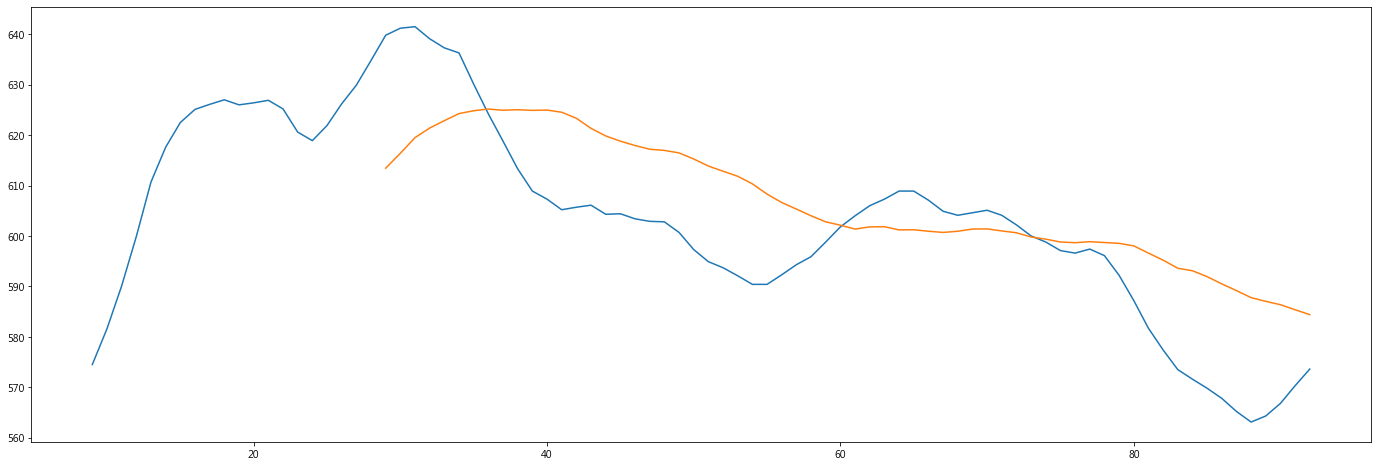

In [23]:
#加上10日均線和30日均線
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df_2330.index), 10))
ax.set_xticklabels(df_2330.index[::10])
mpf.candlestick2_ochl(ax, df_2330['Open'], df_2330['Close'], df_2330['High'],
                      df_2330['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

No handles with labels found to put in legend.


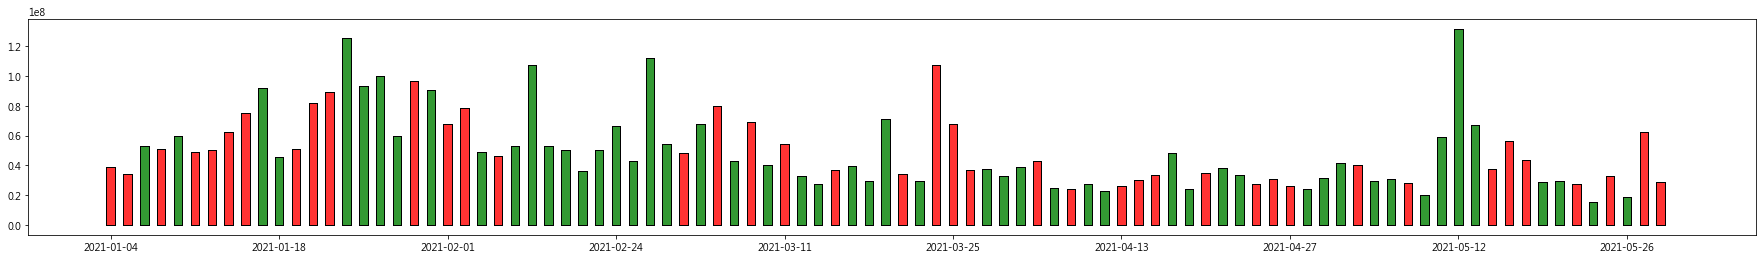

In [34]:
fig = plt.figure(figsize=(24, 15))
ax2 = fig.add_axes([0,0,1,0.2])
#加上交易量
mpf.volume_overlay(ax2, df_2330['Open'], df_2330['Close'], df_2330['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax2.set_xticks(range(0, len(df_2330.index), 10))
ax2.set_xticklabels(df_2330.index[::10])

ax.legend();

In [35]:
#加上KD指標
#KD黃金交叉：當KD指標的K值由下往上突破D值時，建議買進、做多
#KD死亡交叉：當KD指標的K值由上往下跌破D值時，建議賣出、做空
#KD鈍化：K值在高檔 (K > 80) 或低檔( K < 20) 區連續3天，表示再漲的機會就會變得非常高
#KD值的前8天會是Nan，為了讓時間序列相同，因此將Nan值填入0，所以前8天的KD值無參考價值
sma_10 = talib.SMA(np.array(df_2330['Close']), 10)
sma_30 = talib.SMA(np.array(df_2330['Close']), 30)
df_2330['k'], df_2330['d'] = talib.STOCH(df_2330['High'], df_2330['Low'], df_2330['Close'])
df_2330['k'].fillna(value=0, inplace=True)
df_2330['d'].fillna(value=0, inplace=True)
df_2330['k']

2021-01-04     0.000000
2021-01-05     0.000000
2021-01-06     0.000000
2021-01-07     0.000000
2021-01-08     0.000000
                ...    
2021-05-24    76.409933
2021-05-25    81.271044
2021-05-26    81.403319
2021-05-27    85.948773
2021-05-28    84.773560
Name: k, Length: 93, dtype: float64